<a href="https://colab.research.google.com/github/Zyuuu-G/Quantum_code/blob/main/Quantum_hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Quantum hw 7

Ziyu Gao

3/24/2023

In [ ]:
def psi_n(x,n,a):
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)

def E(n,a):
    return (n**2)*(np.pi**2)/(2*a**2)

def wells(x,n_wells,barrier_height,barrier_width):
    a=x-barrier_width
    b=1+barrier_width
    if a % b < 1:
        return 0
    else:
        return barrier_height

def gaus_wells(x_step_size,n_wells,well_width,well_spacing,well_depth,extra_space):
    '''input(x_step_size, n_wells, well_width, well_spacing, well_depth, extra_space)'''
    full_width = 2*extra_space+n_wells*well_spacing
    
    x_well = np.arange(-well_spacing/2,well_spacing/2,x_step_size)
    extra = np.zeros(int(extra_space/x_step_size))+well_depth
    potential = extra
    for i in range(n_wells):
        well_add = -well_depth*np.exp(-x_well**2/well_width**2)+well_depth
        potential = np.append(potential,well_add)
        
    potential = np.append(potential,extra)
    x = np.linspace(0,full_width,len(potential))
    
    return x, potential

In [ ]:
def square_wells(x_step_size, n_wells, well_width, well_spacing, well_depth, extra_space):
    '''input(x_step_size, n_wells, well_width, well_spacing, well_depth, extra_space)'''
    full_width = 2 * extra_space + n_wells * well_spacing

    x = np.linspace(-extra_space, extra_space + (n_wells - 1) * well_spacing + extra_space, int(full_width / x_step_size))

    potential = np.zeros(len(x))
    potential[0:int(extra_space / x_step_size)] = well_depth
    print(int(extra_space / x_step_size))
    potential[-int((extra_space+well_width/2) / x_step_size):] = well_depth
    print(-int(extra_space / x_step_size))
    for i in range(n_wells):
        start = int((extra_space + i * well_spacing - well_width / 2) / x_step_size)
        end = int((extra_space + i * well_spacing + well_width / 2) / x_step_size)
        potential[start:end] = well_depth
 
    return x, potential

## problem 1

200
-200


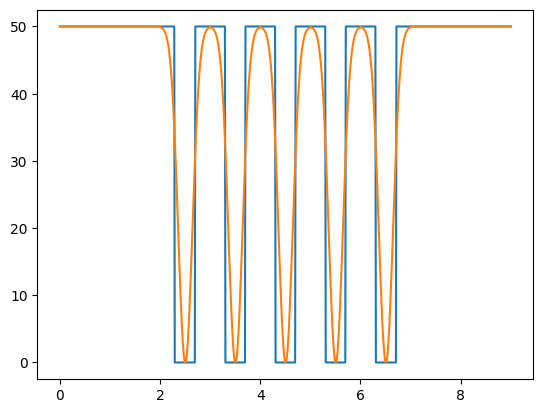

In [ ]:
x, V1 = square_wells(.01,5,.6,1,50,2)

x,V = gaus_wells(.01,5,.2,1,50,2)
plt.plot(x,V1)
plt.plot(x,V)

9.0


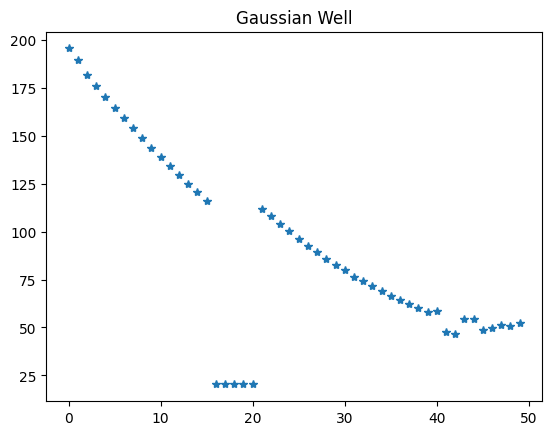

for the guassian well, we have 9 energy states: E = [20.25818222 20.28428518 20.33814443 20.38697494 20.43745829 46.74073526
 47.40854819 48.48179899 49.92962524] 




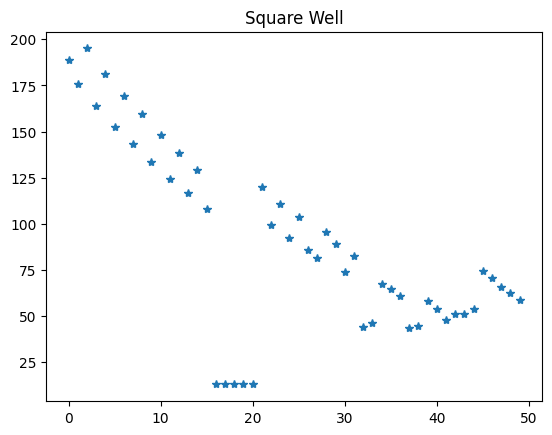

for the square well, we have 10 energy states: E = [12.95427236 12.95430423 13.30304781 13.37106585 13.43345274 43.67369178
 43.9390503  44.77430725 46.5147353  47.8621225 ]


In [ ]:
num_functions = 50
b = x[len(x)-1]-x[0] # getting the width of infinite sq well
print(b)

h_matrixG = np.zeros((num_functions,num_functions)) ### setup the hmatrix for gaus well
for i in range(num_functions):    
    for j in range(num_functions):
        if i==j:
            h_matrixG[i,j]=E(i+1,b)+np.trapz(np.conj(psi_n(x,i+1,b))*V*psi_n(x,j+1,b),x)
        else:
            h_matrixG[i,j]=np.trapz(np.conj(psi_n(x,i+1,b))*V*psi_n(x,j+1,b),x)
             
#plt.matshow(h_matrix)
#plt.show()
valuesG,vectorsG = np.linalg.eig(h_matrixG)
#print(values)

sortG = np.argsort(valuesG) # sort the values by pulling out the ecorrect index in order
#print(sort)
valG = np.zeros_like(valuesG)
vecG = np.zeros_like(vectorsG)

for i in range(num_functions):
    valG[i] = valuesG[sortG[i]]
    vecG[:,i] = vectorsG[:,sortG[i]]
    
plt.plot(valuesG,'*')
plt.title("Gaussian Well")
plt.show()
print("for the guassian well, we have 9 energy states: E =",valG[:9],"\n\n")



h_matrixS = np.zeros((num_functions,num_functions)) ### setup the hmatrix for sq well
for i in range(num_functions):  
    for j in range(num_functions):
        if i==j:
            h_matrixS[i,j]=E(i+1,b)+np.trapz(np.conj(psi_n(x,i+1,b))*V1*psi_n(x,j+1,b),x)
        else:
            h_matrixS[i,j]=np.trapz(np.conj(psi_n(x,i+1,b))*V1*psi_n(x,j+1,b),x)

valuesS,vectorsS = np.linalg.eig(h_matrixS)

sortS = np.argsort(valuesS) 

valS = np.zeros_like(valuesS)
vecS = np.zeros_like(vectorsS)

for i in range(num_functions):
    valS[i] = valuesS[sortS[i]]
    vecS[:,i] = vectorsS[:,sortS[i]]
    
plt.plot(valuesS,'*')
plt.title("Square Well")
plt.show()
print("for the square well, we have 10 energy states: E =",valS[:10])



Small **step_size** should give us more acurate answers since it raises the "resolution"

**extra_space** need to be large enough to cover the range on both sides that the wavefunction vanishes

More **n_wells** will give us more bound states. 

Small **well_width** will result in higher Energe for all the bound states, because it's harder to trap a particle in a smaller space. As the width decreses, we starting to loose some bound states. As the width increses, we starting have more bound states. 

Increase **well_space** inreases the bound states engergies

Lower the **well_depth** will result in more bounded energy states



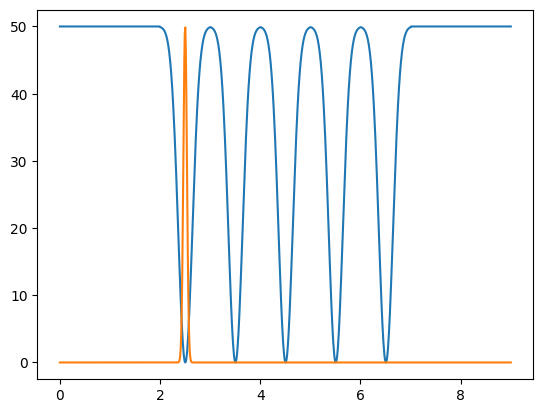

In [ ]:
# animation
x,V = gaus_wells(.01,5,.2,1,50,2)
plt.plot(x,V)

psi = np.exp(-(x-2.50)**2/(.05)**2)
plt.plot(x,50*psi)

# to be continued...

#Schroeder Problem 2.29 

The difference in energy between the two lowest levels of an ammonia
molecule is only 0.99*10^-4 eV. If the molecule starts out in a mixture of these two levels
that puts the nitrogen all on one side of the three hydrogens, at what frequency will it
oscillate back and forth between the two minima of the potential energy function? How
much time does it therefore take to "tunnel" through the potential barrier? If, in the
oscillation process, it radiates an electromagnetic wave with the oscillation frequency,
what is the wavelength? What is the energy of a photon with this wavelength? (This
is the mechanism of the ammonia maser, an early predecessor of the laser.)

In [ ]:
"""E1 = 3.3e-5 # eV # easily calculated from the problem by doing algebra: 4*E1-E1 = .e-4eV
E2 = 1.32e-4
hbar = 6.582119569e-16 # eV*s
t = np.arange(0,500) # s
a = np.pi*(2*E1)**-0.5  # ~386.7
x = np.arange(0,0.0001,0.000000001)   # ?????

wiggle1 = np.exp(-1j*E1*t/hbar)
wiggle2 = np.exp(-1j*E2*t/hbar)

psi1 = np.sqrt(2/a)*np.sin(1*np.pi*x/a)
psi2 = np.sqrt(2/a)*np.sin(2*np.pi*x/a)

psi = c1*psi1+c2*psi2

# numerically integrate over -oo to oo , to pull out the coefs 

# """

'E1 = 3.3e-5 # eV # easily calculated from the problem by doing algebra: 4*E1-E1 = .e-4eV\nE2 = 1.32e-4\nhbar = 6.582119569e-16 # eV*s\nt = np.arange(0,500) # s\na = np.pi*(2*E1)**-0.5  # ~386.7\nx = np.arange(0,0.0001,0.000000001)   # ?????\n\nwiggle1 = np.exp(-1j*E1*t/hbar)\nwiggle2 = np.exp(-1j*E2*t/hbar)\n\npsi1 = np.sqrt(2/a)*np.sin(1*np.pi*x/a)\npsi2 = np.sqrt(2/a)*np.sin(2*np.pi*x/a)\n\npsi = c1*psi1+c2*psi2\n\n# numerically integrate over -oo to oo , to pull out the coefs \n\n# '